# Import the libraries

In [1]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Ignore Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
df = pd.read_csv('hyd_dataset_median.csv')
df.shape

(2205, 22)

In [4]:
df.head()

,Cooler_cond,Valve_cond,pump_leakage,Hyd_accumulator,stable_flag,CE_median,CP_median,PS1_median,PS2_median,PS3_median,...,PS6_median,EPS1_median,FS1_median,FS2_median,SE_median,VS1_median,TS1_median,TS2_median,TS3_median,TS4_median
0,3,100,0,130,1,40.68,1.92,156.25,129.37,2.30,...,9.73,2479.8,7.84,10.33,68.51,0.58,35.57,40.96,38.50,31.58
1,3,100,0,130,1,25.39,1.23,156.06,129.38,2.27,...,9.53,2470.0,7.85,10.40,68.54,0.56,36.77,41.52,38.98,34.55
2,3,100,0,130,1,22.10,1.11,155.72,129.32,2.27,...,9.43,2457.4,7.85,10.37,68.85,0.56,38.02,42.42,39.63,35.63
3,3,100,0,130,1,20.48,1.07,155.56,128.87,2.24,...,9.34,2448.0,7.84,10.30,69.01,0.56,39.05,43.36,40.34,36.64
4,3,100,0,130,1,19.80,1.07,155.34,129.00,2.22,...,9.26,2440.6,7.83,10.24,69.01,0.58,39.97,44.34,41.34,37.44


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 22 columns):
Cooler_cond        2205 non-null int64
Valve_cond         2205 non-null int64
pump_leakage       2205 non-null int64
Hyd_accumulator    2205 non-null int64
stable_flag        2205 non-null int64
CE_median          2205 non-null float64
CP_median          2205 non-null float64
PS1_median         2205 non-null float64
PS2_median         2205 non-null float64
PS3_median         2205 non-null float64
PS4_median         2205 non-null float64
PS5_median         2205 non-null float64
PS6_median         2205 non-null float64
EPS1_median        2205 non-null float64
FS1_median         2205 non-null float64
FS2_median         2205 non-null float64
SE_median          2205 non-null float64
VS1_median         2205 non-null float64
TS1_median         2205 non-null float64
TS2_median         2205 non-null float64
TS3_median         2205 non-null float64
TS4_median         2205 non-null float64
d

# Exploratory Data Analysis

In [6]:
df_corr = df.select_dtypes(include=[np.number])
df_corr.shape

(2205, 22)

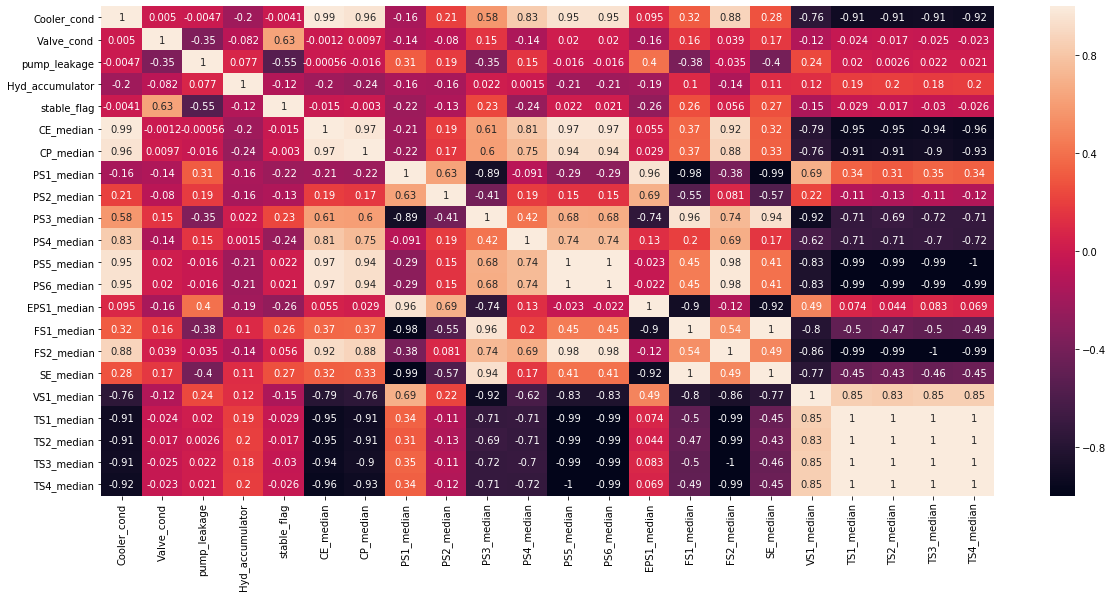

In [7]:
#Corelation plot
corr = df_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

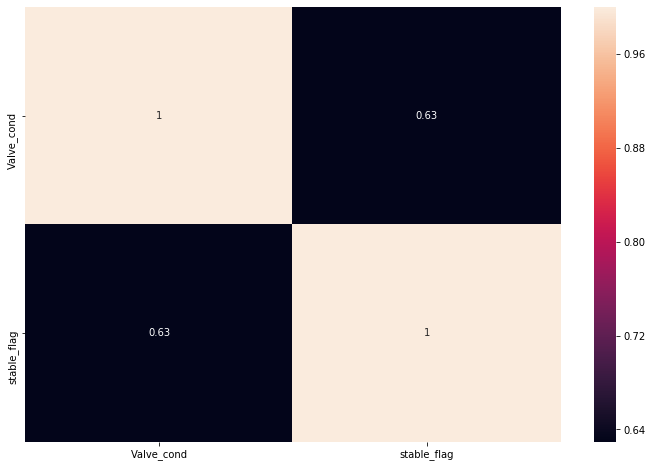

In [8]:
top_feature = corr.index[abs(corr['stable_flag']>0.3)]
plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [9]:
df.Valve_cond.unique()

array([100,  73,  80,  90], dtype=int64)

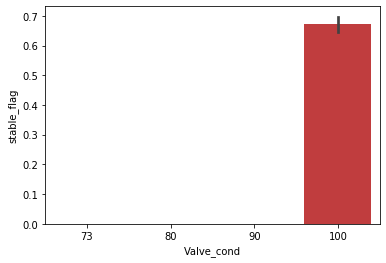

In [10]:
sns.barplot(df.Valve_cond, df.stable_flag)

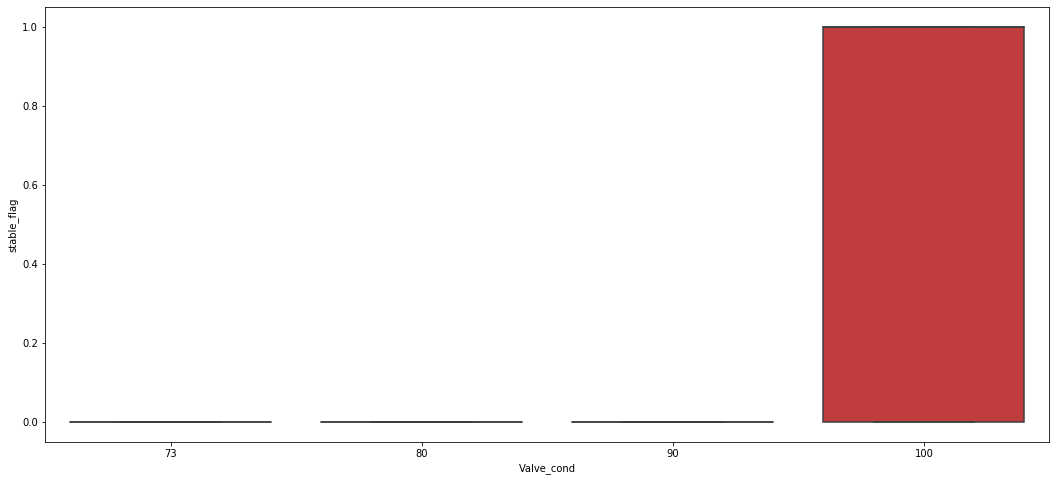

In [11]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=df.Valve_cond, y=df.stable_flag)

In [12]:
print("Most important features relative to target")
corr = df.corr()
corr.sort_values(['Valve_cond'], ascending=False, inplace=True)
corr.stable_flag

Most important features relative to target


Valve_cond         0.629433
stable_flag        1.000000
SE_median          0.273159
FS1_median         0.261441
PS3_median         0.232679
FS2_median         0.055962
PS6_median         0.021483
PS5_median         0.021672
CP_median         -0.002974
Cooler_cond       -0.004105
CE_median         -0.015331
TS2_median        -0.017021
TS4_median        -0.025831
TS1_median        -0.029275
TS3_median        -0.030407
PS2_median        -0.134886
Hyd_accumulator   -0.120817
VS1_median        -0.145752
PS1_median        -0.222998
PS4_median        -0.244469
EPS1_median       -0.263665
pump_leakage      -0.549678
Name: stable_flag, dtype: float64

# Data Preprocessing

In [13]:
df.isnull().any()

Cooler_cond        False
Valve_cond         False
pump_leakage       False
Hyd_accumulator    False
stable_flag        False
CE_median          False
CP_median          False
PS1_median         False
PS2_median         False
PS3_median         False
PS4_median         False
PS5_median         False
PS6_median         False
EPS1_median        False
FS1_median         False
FS2_median         False
SE_median          False
VS1_median         False
TS1_median         False
TS2_median         False
TS3_median         False
TS4_median         False
dtype: bool

In [14]:
cols = df.columns
cols

Index(['Cooler_cond', 'Valve_cond', 'pump_leakage', 'Hyd_accumulator',
       'stable_flag', 'CE_median', 'CP_median', 'PS1_median', 'PS2_median',
       'PS3_median', 'PS4_median', 'PS5_median', 'PS6_median', 'EPS1_median',
       'FS1_median', 'FS2_median', 'SE_median', 'VS1_median', 'TS1_median',
       'TS2_median', 'TS3_median', 'TS4_median'],
      dtype='object')

In [15]:
cat_cols = ['Cooler_cond', 'Valve_cond', 'pump_leakage', 'Hyd_accumulator']
num_cols = cols.copy()
num_cols = num_cols[~np.in1d(num_cols, cat_cols)]
num_cols

Index(['stable_flag', 'CE_median', 'CP_median', 'PS1_median', 'PS2_median',
       'PS3_median', 'PS4_median', 'PS5_median', 'PS6_median', 'EPS1_median',
       'FS1_median', 'FS2_median', 'SE_median', 'VS1_median', 'TS1_median',
       'TS2_median', 'TS3_median', 'TS4_median'],
      dtype='object')

In [16]:
cat_col_index = [df.columns.get_loc(c) for c in cat_cols if c in df]
num_col_index = [df.columns.get_loc(c) for c in num_cols if c in df]

## Outlier Detection

In [17]:
# from sklearn.ensemble import IsolationForest

# clf = IsolationForest(max_samples = 100, random_state = 42)
# clf.fit(df)
# y_noano = clf.predict(df)
# y_noano = pd.DataFrame(y_noano, columns = ['Top'])
# y_noano[y_noano['Top'] == 1].index.values

# df = df.iloc[y_noano[y_noano['Top'] == 1].index.values]
# df.reset_index(drop = True, inplace = True)
# print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
# print("Number of rows without outliers:", df.shape[0])

In [18]:
# from scipy import stats
# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# df.shape

In [19]:
from scipy import stats
for col in df.columns: 
     df[col] = stats.mstats.winsorize(df[col], limits=0.01)

## Univariate Analysis

In [20]:
# fig, axs = plt.subplots(cols.size)
# fig.suptitle('Box plots for features and target variables')

# for i in range(cols.size):
#     df.boxplot(column = df.columns[i], ax=axs[i]);

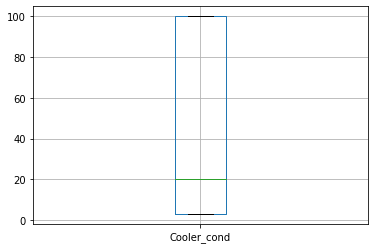

In [21]:
df.boxplot(column = df.columns[0]);

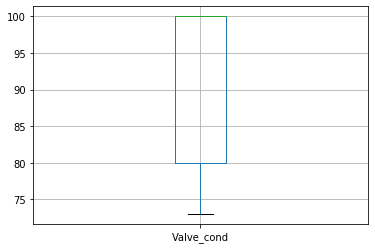

In [22]:
df.boxplot(column = df.columns[1]);

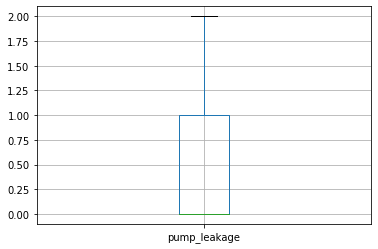

In [23]:
df.boxplot(column = df.columns[2]);

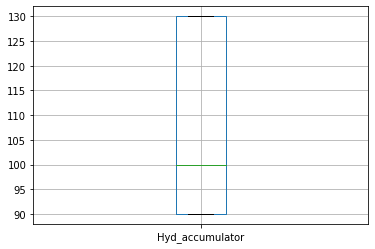

In [24]:
df.boxplot(column = df.columns[3]);

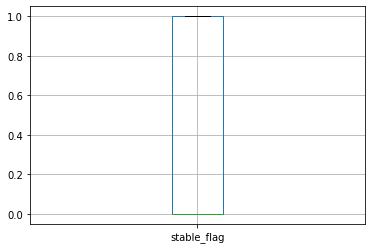

In [25]:
df.boxplot(column = df.columns[4]);

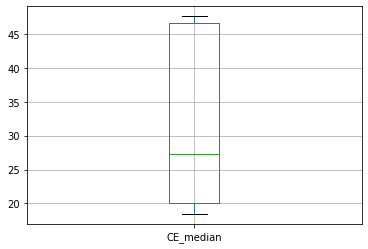

In [26]:
df.boxplot(column = df.columns[5]);

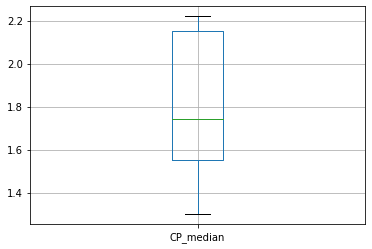

In [27]:
df.boxplot(column = df.columns[6]);

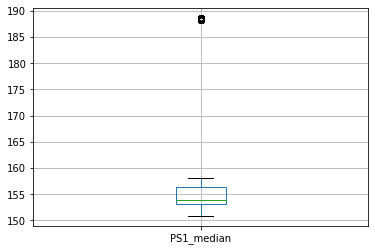

In [28]:
df.boxplot(column = df.columns[7]);

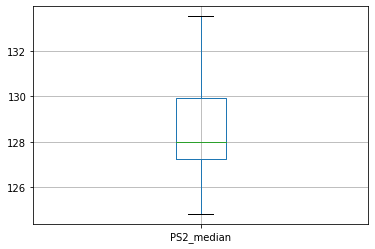

In [29]:
df.boxplot(column = df.columns[8]);

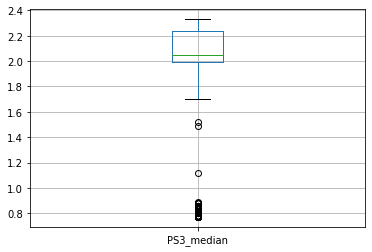

In [30]:
df.boxplot(column = df.columns[9]);

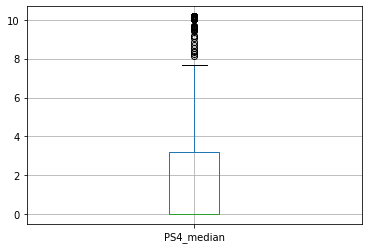

In [31]:
df.boxplot(column = df.columns[10]);

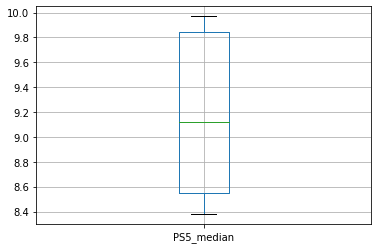

In [32]:
df.boxplot(column = df.columns[11]);

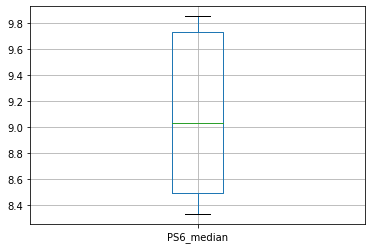

In [33]:
df.boxplot(column = df.columns[12]);

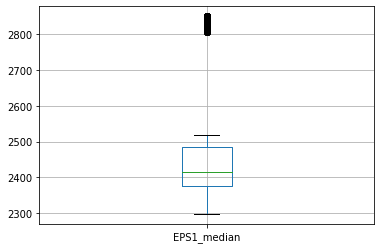

In [34]:
df.boxplot(column = df.columns[13]);

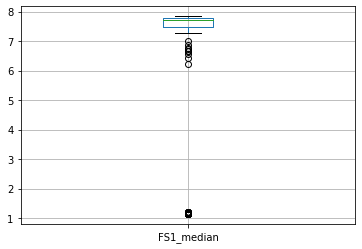

In [35]:
df.boxplot(column = df.columns[14]);

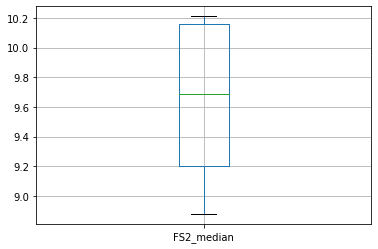

In [36]:
df.boxplot(column = df.columns[15]);

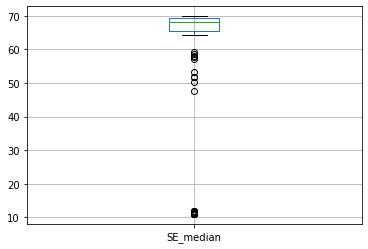

In [37]:
df.boxplot(column = df.columns[16]);

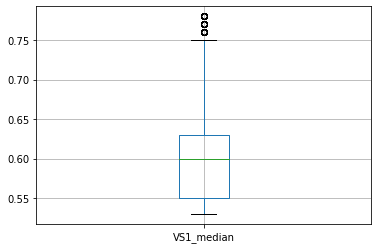

In [38]:
df.boxplot(column = df.columns[17]);

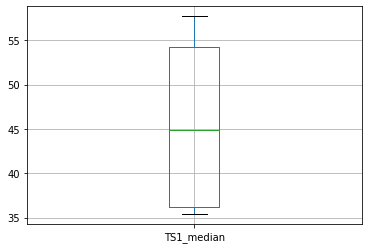

In [39]:
df.boxplot(column = df.columns[18]);

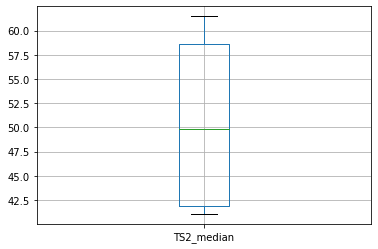

In [40]:
df.boxplot(column = df.columns[19]);

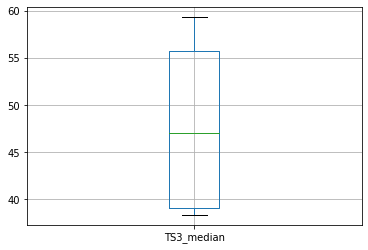

In [41]:
df.boxplot(column = df.columns[20]);

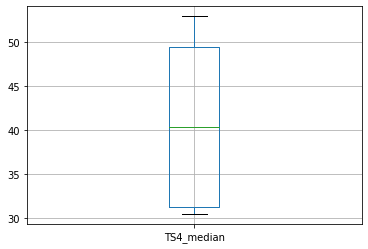

In [42]:
df.boxplot(column = df.columns[21]);

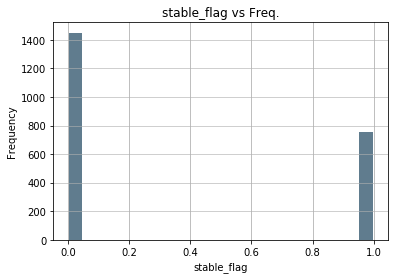

In [43]:
df[cols[num_col_index[0]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[0]]+' vs Freq.')
plt.xlabel(cols[num_col_index[0]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

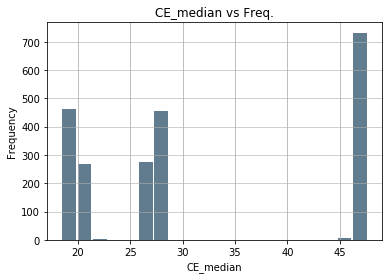

In [44]:
df[cols[num_col_index[1]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[1]]+' vs Freq.')
plt.xlabel(cols[num_col_index[1]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

#### This is an example of multi-modal distribution. It should be treated to convert it to unimodal distribution. But not in scpoe of this dataset


#### For Detecting Multi-modality -	Dips test
#### To convert multi-modality to unimodality -	Bakers test

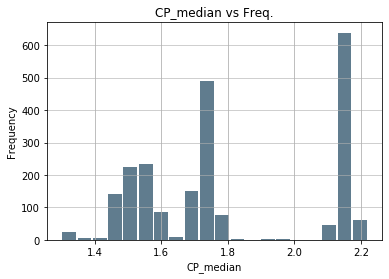

In [45]:
df[cols[num_col_index[2]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[2]]+' vs Freq.')
plt.xlabel(cols[num_col_index[2]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

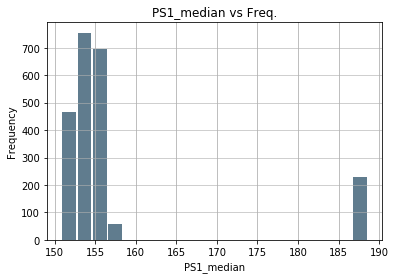

In [46]:
df[cols[num_col_index[3]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[3]]+' vs Freq.')
plt.xlabel(cols[num_col_index[3]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

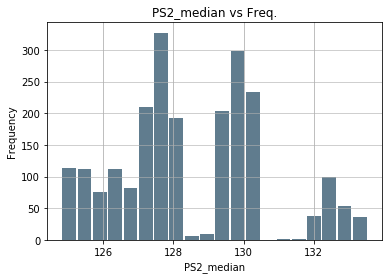

In [47]:
df[cols[num_col_index[4]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[4]]+' vs Freq.')
plt.xlabel(cols[num_col_index[4]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

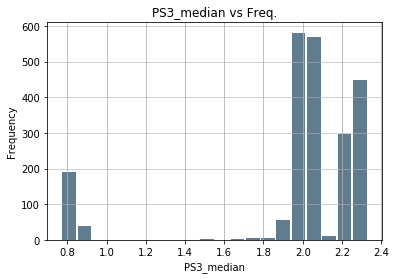

In [48]:
df[cols[num_col_index[5]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[5]]+' vs Freq.')
plt.xlabel(cols[num_col_index[5]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

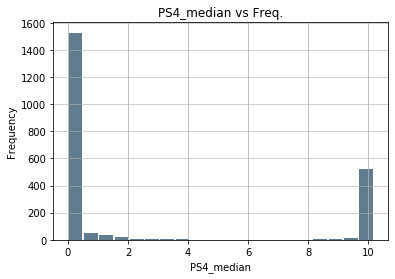

In [49]:
df[cols[num_col_index[6]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[6]]+' vs Freq.')
plt.xlabel(cols[num_col_index[6]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

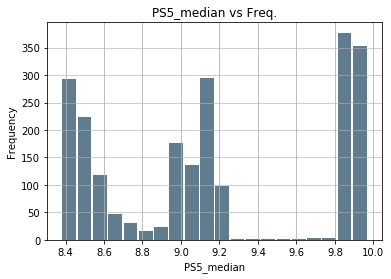

In [50]:
df[cols[num_col_index[7]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[7]]+' vs Freq.')
plt.xlabel(cols[num_col_index[7]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

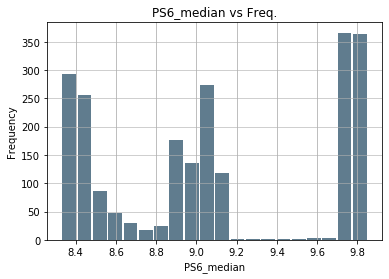

In [51]:
df[cols[num_col_index[8]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[8]]+' vs Freq.')
plt.xlabel(cols[num_col_index[8]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

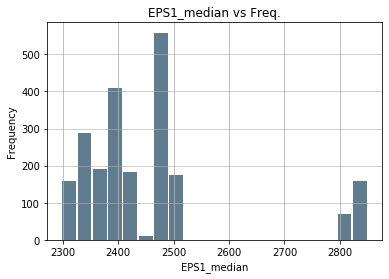

In [52]:
df[cols[num_col_index[9]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[9]]+' vs Freq.')
plt.xlabel(cols[num_col_index[9]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

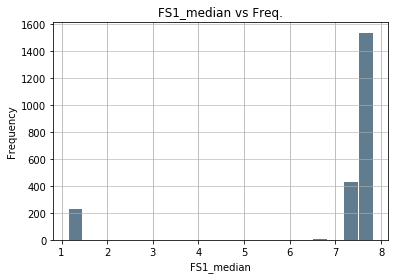

In [53]:
df[cols[num_col_index[10]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[10]]+' vs Freq.')
plt.xlabel(cols[num_col_index[10]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

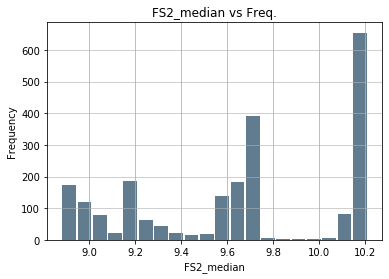

In [54]:
df[cols[num_col_index[11]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[11]]+' vs Freq.')
plt.xlabel(cols[num_col_index[11]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

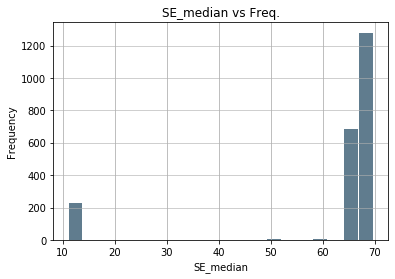

In [55]:
df[cols[num_col_index[12]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[12]]+' vs Freq.')
plt.xlabel(cols[num_col_index[12]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

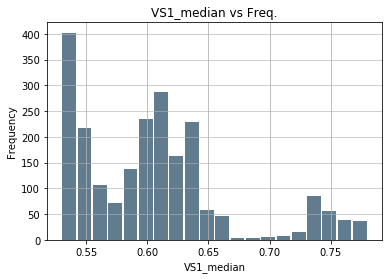

In [56]:
df[cols[num_col_index[13]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[13]]+' vs Freq.')
plt.xlabel(cols[num_col_index[13]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

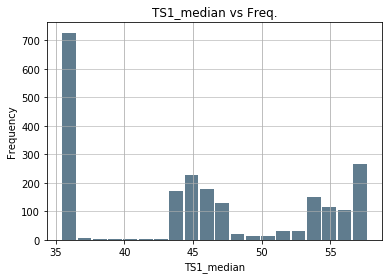

In [57]:
df[cols[num_col_index[14]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[14]]+' vs Freq.')
plt.xlabel(cols[num_col_index[14]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

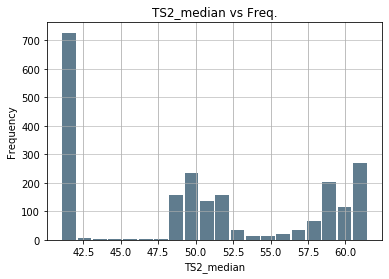

In [58]:
df[cols[num_col_index[15]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[15]]+' vs Freq.')
plt.xlabel(cols[num_col_index[15]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

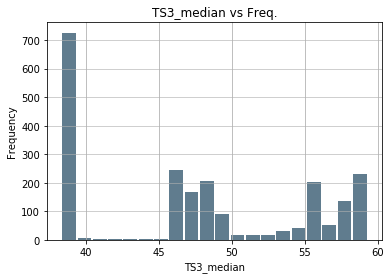

In [59]:
df[cols[num_col_index[16]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[16]]+' vs Freq.')
plt.xlabel(cols[num_col_index[16]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

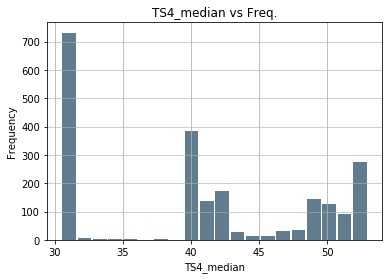

In [60]:
df[cols[num_col_index[17]]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[num_col_index[17]]+' vs Freq.')
plt.xlabel(cols[num_col_index[17]])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Encoding

## Label Encoding

In [61]:
df.head()

,Cooler_cond,Valve_cond,pump_leakage,Hyd_accumulator,stable_flag,CE_median,CP_median,PS1_median,PS2_median,PS3_median,...,PS6_median,EPS1_median,FS1_median,FS2_median,SE_median,VS1_median,TS1_median,TS2_median,TS3_median,TS4_median
0,3,100,0,130,1,40.68,1.92,156.25,129.37,2.30,...,9.73,2479.8,7.84,10.21,68.51,0.58,35.57,41.05,38.50,31.58
1,3,100,0,130,1,25.39,1.30,156.06,129.38,2.27,...,9.53,2470.0,7.84,10.21,68.54,0.56,36.77,41.52,38.98,34.55
2,3,100,0,130,1,22.10,1.30,155.72,129.32,2.27,...,9.43,2457.4,7.84,10.21,68.85,0.56,38.02,42.42,39.63,35.63
3,3,100,0,130,1,20.48,1.30,155.56,128.87,2.24,...,9.34,2448.0,7.84,10.21,69.01,0.56,39.05,43.36,40.34,36.64
4,3,100,0,130,1,19.80,1.30,155.34,129.00,2.22,...,9.26,2440.6,7.83,10.21,69.01,0.58,39.97,44.34,41.34,37.44


In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df_LE = df.copy(deep=True)
for c in cat_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df_LE[c] = lbl.transform(list(df[c].values))

In [63]:
df_LE.head()

,Cooler_cond,Valve_cond,pump_leakage,Hyd_accumulator,stable_flag,CE_median,CP_median,PS1_median,PS2_median,PS3_median,...,PS6_median,EPS1_median,FS1_median,FS2_median,SE_median,VS1_median,TS1_median,TS2_median,TS3_median,TS4_median
0,0,3,0,3,1,40.68,1.92,156.25,129.37,2.30,...,9.73,2479.8,7.84,10.21,68.51,0.58,35.57,41.05,38.50,31.58
1,0,3,0,3,1,25.39,1.30,156.06,129.38,2.27,...,9.53,2470.0,7.84,10.21,68.54,0.56,36.77,41.52,38.98,34.55
2,0,3,0,3,1,22.10,1.30,155.72,129.32,2.27,...,9.43,2457.4,7.84,10.21,68.85,0.56,38.02,42.42,39.63,35.63
3,0,3,0,3,1,20.48,1.30,155.56,128.87,2.24,...,9.34,2448.0,7.84,10.21,69.01,0.56,39.05,43.36,40.34,36.64
4,0,3,0,3,1,19.80,1.30,155.34,129.00,2.22,...,9.26,2440.6,7.83,10.21,69.01,0.58,39.97,44.34,41.34,37.44


## Split Features and Target

In [110]:
X = df_LE.copy(deep=True)
del X['stable_flag']
y = df_LE['stable_flag']

In [111]:
# X = df.copy(deep=True)
# del X['stable_flag']
# y = df['stable_flag']

## OneHotEncoding

In [112]:
cat_cols

['Cooler_cond', 'Valve_cond', 'pump_leakage', 'Hyd_accumulator']

In [113]:
X.head()

,Cooler_cond,Valve_cond,pump_leakage,Hyd_accumulator,CE_median,CP_median,PS1_median,PS2_median,PS3_median,PS4_median,...,PS6_median,EPS1_median,FS1_median,FS2_median,SE_median,VS1_median,TS1_median,TS2_median,TS3_median,TS4_median
0,0,3,0,3,40.68,1.92,156.25,129.37,2.30,0.0,...,9.73,2479.8,7.84,10.21,68.51,0.58,35.57,41.05,38.50,31.58
1,0,3,0,3,25.39,1.30,156.06,129.38,2.27,0.0,...,9.53,2470.0,7.84,10.21,68.54,0.56,36.77,41.52,38.98,34.55
2,0,3,0,3,22.10,1.30,155.72,129.32,2.27,0.0,...,9.43,2457.4,7.84,10.21,68.85,0.56,38.02,42.42,39.63,35.63
3,0,3,0,3,20.48,1.30,155.56,128.87,2.24,0.0,...,9.34,2448.0,7.84,10.21,69.01,0.56,39.05,43.36,40.34,36.64
4,0,3,0,3,19.80,1.30,155.34,129.00,2.22,0.0,...,9.26,2440.6,7.83,10.21,69.01,0.58,39.97,44.34,41.34,37.44


In [114]:
# onehotencoder = OneHotEncoder(categorical_features = cat_col_index)
# onehotencoder = OneHotEncoder(categories='auto', sparse=False)
# X_OHE = pd.DataFrame(onehotencoder.fit_transform(X))

X_OLE = X.copy(deep=True)
X_OLE = X_OLE.astype({'Cooler_cond': str, 'Valve_cond': str, 'pump_leakage': str, 'Hyd_accumulator':str})
# X.info()
for f in cat_cols:
    X_temp = X_OLE[[f]]
    X_OLE_temp = (pd.get_dummies(X_temp, prefix='', prefix_sep='')
                   .max(level=0, axis=1)
                   .add_prefix(f+' - ')) 
    X_OLE = pd.concat([X_OLE, X_OLE_temp], axis=1)
    X_OLE = X_OLE.drop([f], axis = 1)

print(X_OLE.columns)
X_OLE.head()

Index(['CE_median', 'CP_median', 'PS1_median', 'PS2_median', 'PS3_median',
       'PS4_median', 'PS5_median', 'PS6_median', 'EPS1_median', 'FS1_median',
       'FS2_median', 'SE_median', 'VS1_median', 'TS1_median', 'TS2_median',
       'TS3_median', 'TS4_median', 'Cooler_cond - 0', 'Cooler_cond - 1',
       'Cooler_cond - 2', 'Valve_cond - 0', 'Valve_cond - 1', 'Valve_cond - 2',
       'Valve_cond - 3', 'pump_leakage - 0', 'pump_leakage - 1',
       'pump_leakage - 2', 'Hyd_accumulator - 0', 'Hyd_accumulator - 1',
       'Hyd_accumulator - 2', 'Hyd_accumulator - 3'],
      dtype='object')


,CE_median,CP_median,PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,EPS1_median,FS1_median,...,Valve_cond - 1,Valve_cond - 2,Valve_cond - 3,pump_leakage - 0,pump_leakage - 1,pump_leakage - 2,Hyd_accumulator - 0,Hyd_accumulator - 1,Hyd_accumulator - 2,Hyd_accumulator - 3
0,40.68,1.92,156.25,129.37,2.30,0.0,9.84,9.73,2479.8,7.84,...,0,0,1,1,0,0,0,0,0,1
1,25.39,1.30,156.06,129.38,2.27,0.0,9.63,9.53,2470.0,7.84,...,0,0,1,1,0,0,0,0,0,1
2,22.10,1.30,155.72,129.32,2.27,0.0,9.53,9.43,2457.4,7.84,...,0,0,1,1,0,0,0,0,0,1
3,20.48,1.30,155.56,128.87,2.24,0.0,9.44,9.34,2448.0,7.84,...,0,0,1,1,0,0,0,0,0,1
4,19.80,1.30,155.34,129.00,2.22,0.0,9.36,9.26,2440.6,7.83,...,0,0,1,1,0,0,0,0,0,1


In [116]:
X_OHE = X_OLE.copy(deep=True)
X_OHE.shape

(2205, 31)

# Feature Scaling

In [117]:
#normalize the dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler = StandardScaler()
X_OHE_SC = pd.DataFrame(scaler.fit_transform(X_OHE))

In [118]:
X_OHE_SC.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.812109,0.426811,-0.128518,0.419573,0.769349,-0.598979,1.175284,1.185759,0.155739,0.425501,...,-0.441726,-0.441726,0.979796,0.897718,-0.535925,-0.535925,-0.760514,-0.470032,-0.470032,1.637417
1,-0.510419,-1.877118,-0.146360,0.424357,0.697999,-0.598979,0.810802,0.821609,0.086167,0.425501,...,-0.441726,-0.441726,0.979796,0.897718,-0.535925,-0.535925,-0.760514,-0.470032,-0.470032,1.637417
2,-0.794991,-1.877118,-0.178286,0.395650,0.697999,-0.598979,0.637239,0.639534,-0.003283,0.425501,...,-0.441726,-0.441726,0.979796,0.897718,-0.535925,-0.535925,-0.760514,-0.470032,-0.470032,1.637417
3,-0.935115,-1.877118,-0.193311,0.180342,0.626649,-0.598979,0.481033,0.475666,-0.070015,0.425501,...,-0.441726,-0.441726,0.979796,0.897718,-0.535925,-0.535925,-0.760514,-0.470032,-0.470032,1.637417
4,-0.993933,-1.877118,-0.213969,0.242542,0.579083,-0.598979,0.342182,0.330006,-0.122549,0.420492,...,-0.441726,-0.441726,0.979796,0.897718,-0.535925,-0.535925,-0.760514,-0.470032,-0.470032,1.637417


In [119]:
X_OHE_SC.shape

(2205, 31)

# Export pre-processed data

In [120]:
X_OHE_SC.to_csv('hydraulics_preprocessed_data.csv', index=False)

# Train-Test Split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_OHE_SC, y, test_size=0.2, random_state=1234, stratify=y)

In [122]:
y_train.value_counts()

0    1159
1     605
Name: stable_flag, dtype: int64

In [123]:
y_test.value_counts()

0    290
1    151
Name: stable_flag, dtype: int64

# Logistic Regression - Without SMOTE

## Model Creation

In [127]:
%%time
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(penalty='l2', tol=0.0001, C=0.5, fit_intercept=True, intercept_scaling=1.5, class_weight=None, random_state=123, max_iter=100, verbose=0, warm_start=False, n_jobs=None)
lg_model.fit(X_train, y_train)


Wall time: 36 ms


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1.5, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Cross-Validation

In [418]:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict

# Create k-Fold cross-validation
kf = KFold(n_splits=20, shuffle=True, random_state=123)
# Do k-fold cross-validation
cv_results = cross_val_score(lg_model, # Model
                             X_train, # Feature matrix
                             y_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
print(cv_results.mean())

predicted = cross_val_predict(lg_model, X_train, y_train, cv=10)
print(metrics.accuracy_score(y_train, predicted))
print(metrics.classification_report(y_train, predicted))

0.9240360061287026
0.9246031746031746
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1159
           1       0.86      0.94      0.90       605

    accuracy                           0.92      1764
   macro avg       0.91      0.93      0.92      1764
weighted avg       0.93      0.92      0.93      1764



## Prediction and Accuracy Check

f1=0.922 auc=0.976 ap=0.976


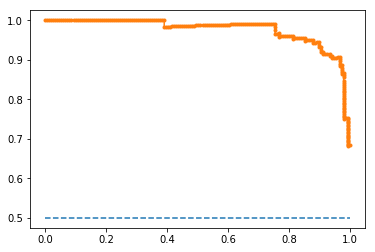

In [419]:
# predict probabilities
lg_probs = lg_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lg_probs = lg_probs[:, 1]
# predict class values
yhat = lg_model.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, lg_probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, lg_probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## ROC Curve

In [420]:
y_test.shape

(441,)

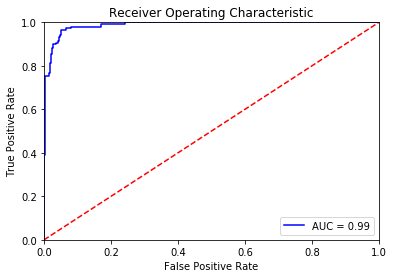

In [421]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, lg_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Precision and Recall

In [422]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Precision Score :", precision_score(y_test, yhat, average="macro"))
print("Recall Score :", recall_score(y_test, yhat, average="macro"))
print("F1 Score :", f1_score(y_test, yhat, average="macro"))

Precision Score : 0.9363842289405222
Recall Score : 0.9443366065311716
F1 Score : 0.9401330376940132


# Logistic Regression - With SMOTE

In [423]:
print(X_OHE_SC.shape)
print(y.shape)

(2205, 31)
(2205,)


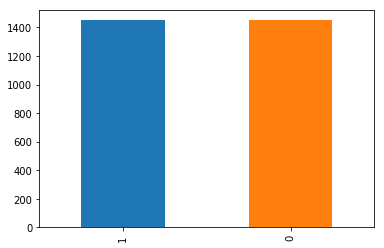

In [424]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 123, k_neighbors=5)
X_new, y_new = sm.fit_sample(X_OHE_SC, y)
pd.Series(y_new).value_counts().plot.bar()

In [425]:
df_smote = pd.DataFrame(X_new.copy())
df_smote['stable_flag'] = y_new
df_smote.shape
df_smote.to_csv('hydraulics_preprocessed_data_with_smote.csv', index=False)

In [426]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_new, y_new, test_size=0.1, random_state=1234, stratify=y_new)

In [427]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(penalty='l1', tol=0.0001, C=0.5, fit_intercept=True, intercept_scaling=1.5, class_weight=None, random_state=123, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
lg_model.fit(X_train_sm, y_train_sm)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1.5, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [428]:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict

# Create k-Fold cross-validation
kf = KFold(n_splits=20, shuffle=True, random_state=123)
# Do k-fold cross-validation
cv_results = cross_val_score(lg_model, # Model
                             X_train_sm, # Feature matrix
                             y_train_sm, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
print(cv_results.mean())

predicted = cross_val_predict(lg_model, X_train_sm, y_train_sm, cv=10)
print(metrics.accuracy_score(y_train_sm, predicted))
print(metrics.classification_report(y_train_sm, predicted))

0.9398003523194364
0.9398006134969326
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1304
           1       0.91      0.97      0.94      1304

    accuracy                           0.94      2608
   macro avg       0.94      0.94      0.94      2608
weighted avg       0.94      0.94      0.94      2608



f1=0.970 auc=0.991 ap=0.991


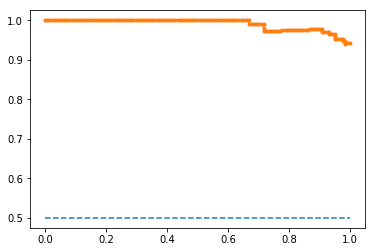

In [429]:
# predict probabilities
lg_probs = lg_model.predict_proba(X_test_sm)
# print(lg_probs)
# keep probabilities for the positive outcome only
lg_probs = lg_probs[:, 1]
# predict class values
yhat = lg_model.predict(X_test_sm)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_sm, lg_probs)
# calculate F1 score
f1 = f1_score(y_test_sm, yhat)
# calculate precision-recall AUC
auc_F = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test_sm, lg_probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_F, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()
# print(thresholds)

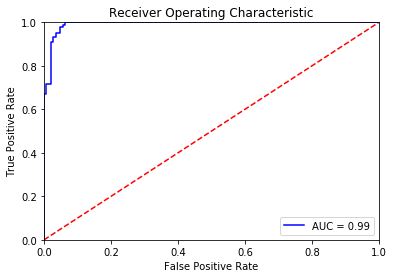

In [430]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test_sm, lg_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [431]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Precision Score :", precision_score(y_test_sm, yhat, average="macro"))
print("Recall Score :", recall_score(y_test_sm, yhat, average="macro"))
print("F1 Score :", f1_score(y_test_sm, yhat, average="macro"))

Precision Score : 0.9707792207792207
Recall Score : 0.9689655172413794
F1 Score : 0.9689355979004749


# RandomForestClassifier - With SMOTE

In [432]:
from sklearn.ensemble import RandomForestClassifier

rndm_clf = RandomForestClassifier(n_jobs=89, random_state=123)

rndm_clf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=89,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

f1=0.986 auc=1.000 ap=1.000


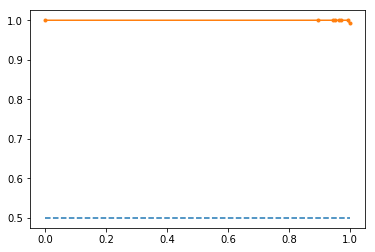

In [433]:
# predict probabilities
rndm_probs = rndm_clf.predict_proba(X_test_sm)

# keep probabilities for the positive outcome only
rndm_probs = rndm_probs[:, 1]
# predict class values
yhat = rndm_clf.predict(X_test_sm)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_sm, rndm_probs)
# calculate F1 score
f1 = f1_score(y_test_sm, yhat)
# calculate precision-recall AUC
auc_F = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test_sm, rndm_probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_F, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()
# print(thresholds)

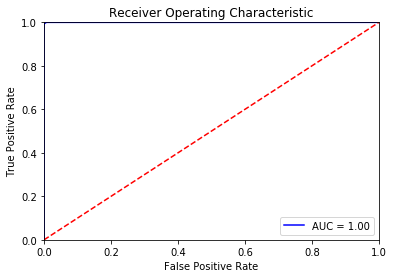

In [434]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test_sm, rndm_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [435]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Precision Score :", precision_score(y_test_sm, yhat, average="macro"))
print("Recall Score :", recall_score(y_test_sm, yhat, average="macro"))
print("F1 Score :", f1_score(y_test_sm, yhat, average="macro"))

Precision Score : 0.9865771812080537
Recall Score : 0.9862068965517241
F1 Score : 0.9862042719185575


# XGBoostClassifier - With SMOTE

In [436]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=92, random_state=123, max_depth=5, learning_rate=0.05)
xgb_clf.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=92, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

f1=0.997 auc=1.000 ap=1.000


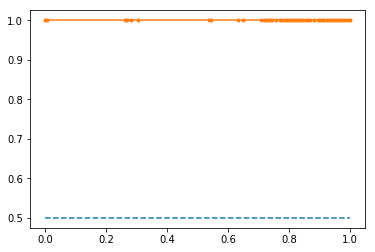

In [437]:
# predict probabilities
xgb_probs = xgb_clf.predict_proba(X_test_sm)

# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# predict class values
yhat = xgb_clf.predict(X_test_sm)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_sm, xgb_probs)
# calculate F1 score
f1 = f1_score(y_test_sm, yhat)
# calculate precision-recall AUC
auc_F = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test_sm, xgb_probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_F, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()
# print(thresholds)

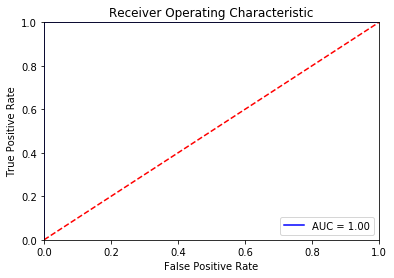

In [438]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test_sm, xgb_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [439]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Precision Score :", precision_score(y_test_sm, yhat, average="macro"))
print("Recall Score :", recall_score(y_test_sm, yhat, average="macro"))
print("F1 Score :", f1_score(y_test_sm, yhat, average="macro"))

Precision Score : 0.9965753424657534
Recall Score : 0.996551724137931
F1 Score : 0.9965516831353524


# OneClassSVM - Without SMOTE

In [440]:
y_test.head()

707     0
1588    1
1390    0
732     1
1117    0
Name: stable_flag, dtype: int64

In [441]:
y_test_inv = abs(y_test-1)
y_train_inv = abs(y_train-1)

In [442]:
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC
svc_clf = SVC(gamma='auto', probability=True, random_state=123, degree=2)
svc_clf.fit(X_test, y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

f1=0.924 auc=0.984 ap=0.984


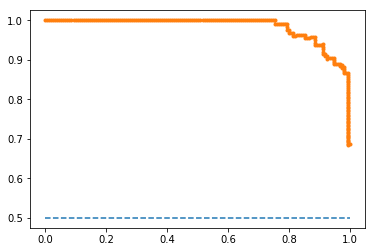

In [443]:
# predict probabilities
svc_probs = svc_clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
svc_probs = svc_probs[:, 1]
# predict class values
yhat = svc_clf.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, svc_probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc_F = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, svc_probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_F, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()
# print(thresholds)

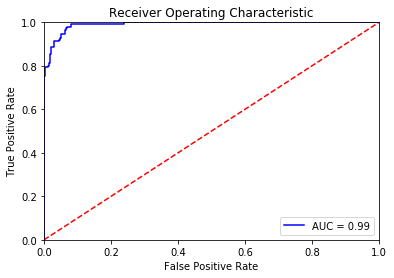

In [444]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, svc_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [445]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
yhat = svc_clf.predict(X_test)
print("Precision Score :", precision_score(y_test, yhat, average="macro"))
print("Recall Score :", recall_score(y_test, yhat, average="macro"))
print("F1 Score :", f1_score(y_test, yhat, average="macro"))
print("Confusion Matrix :\n", confusion_matrix(y_test, yhat))
tn, fp, fn, tp = confusion_matrix(y_test, yhat).ravel()
print("True positive : ", tp)
print("False positive : ", fp)
print("True negative : ", tn)
print("False negative : ", fn)

Precision Score : 0.9333662714097497
Recall Score : 0.9506850879196164
F1 Score : 0.9408239030281345
Confusion Matrix :
 [[271  19]
 [  5 146]]
True positive :  146
False positive :  19
True negative :  271
False negative :  5


### Baseline metrics (chosen from XGBoostClassifier) are as follows:
Precision Score : 0.9965753424657534;
Recall Score : 0.996551724137931;
F1 Score : 0.9965516831353524;